### 1. Imports

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maharshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))       

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 2. EDA

In [4]:
df = pd.read_csv('twitter.csv', encoding = "ISO-8859-1")

In [5]:
df.shape

(1599999, 6)

>There are 1,600,000 data samples but the first data point has been read as the column names.

In [6]:
df.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
col_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("twitter.csv",
                 names = col_names,
                 encoding = "ISO-8859-1")

In [8]:
df.shape

(1600000, 6)

In [9]:
df.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [12]:
df.duplicated().sum()

0

In [13]:
df_flag=df['flag'].describe()
df_flag

count      1600000
unique           1
top       NO_QUERY
freq       1600000
Name: flag, dtype: object

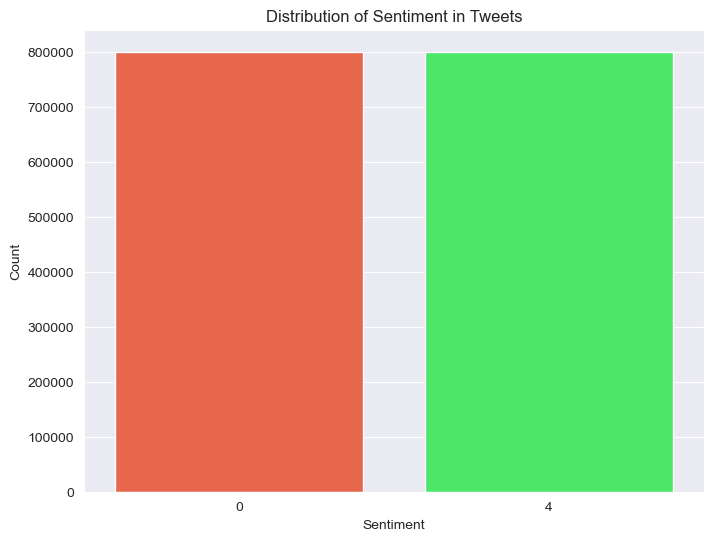

In [14]:
sns.set_style("darkgrid")
custom_palette = ["#FF5733", "#33FF57"]  
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette=custom_palette)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Tweets')
plt.savefig('sentiment.jpg')
plt.show()

### Balanced dataset!!

##### 0 --> Negative Tweet, 1 --> Positive Tweet

In [15]:
df.replace({'target':{4:1}}, inplace = True)

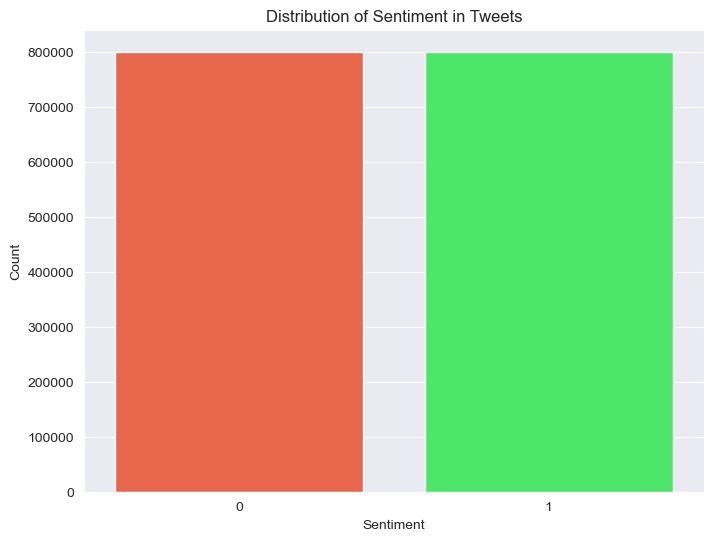

In [16]:
sns.set_style("darkgrid")
custom_palette = ["#FF5733", "#33FF57"]  
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette=custom_palette)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Tweets')
plt.show()

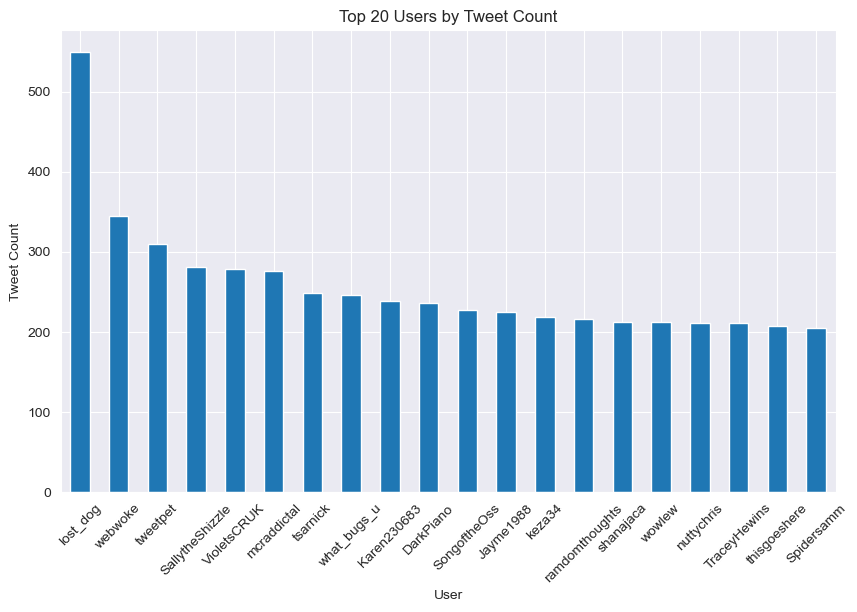

In [17]:
plt.figure(figsize=(10, 6))
df['user'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Users by Tweet Count')
plt.xlabel('User')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.savefig('Tweetcount')
plt.show()

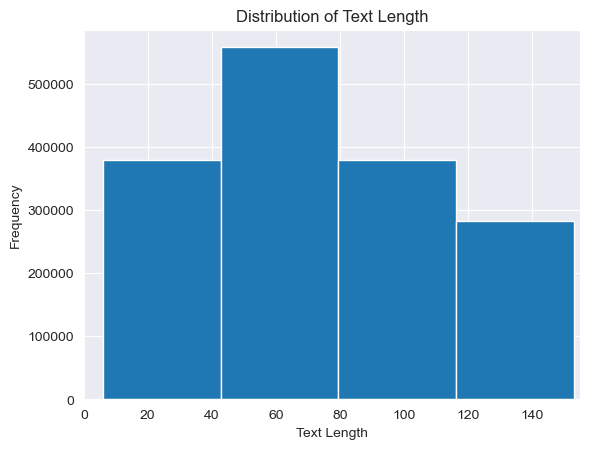

In [18]:
df['text_length'] = df['text'].apply(len)
plt.hist(df['text_length'], bins=10)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim(0, 155)
plt.show()

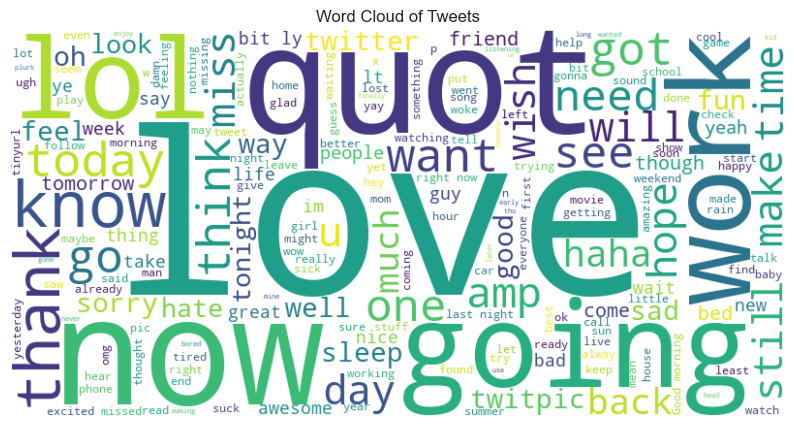

In [19]:
from wordcloud import WordCloud
text = ' '.join(df['text'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

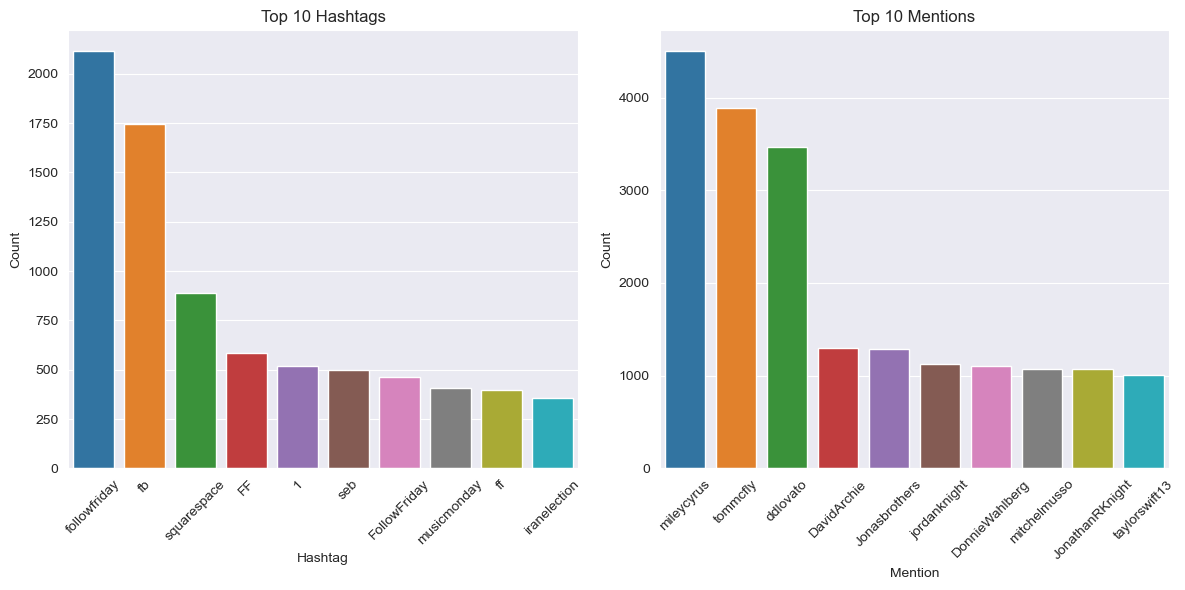

In [20]:
from collections import Counter
hashtags = []
mentions = []
for text in df['text']:
    hashtags.extend(re.findall(r'#(\w+)', text))
    mentions.extend(re.findall(r'@(\w+)', text))
top_hashtags = Counter(hashtags).most_common(10)
top_mentions = Counter(mentions).most_common(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[tag[0] for tag in top_hashtags], y=[tag[1] for tag in top_hashtags])
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=[mention[0] for mention in top_mentions], y=[mention[1] for mention in top_mentions])
plt.title('Top 10 Mentions')
plt.xlabel('Mention')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

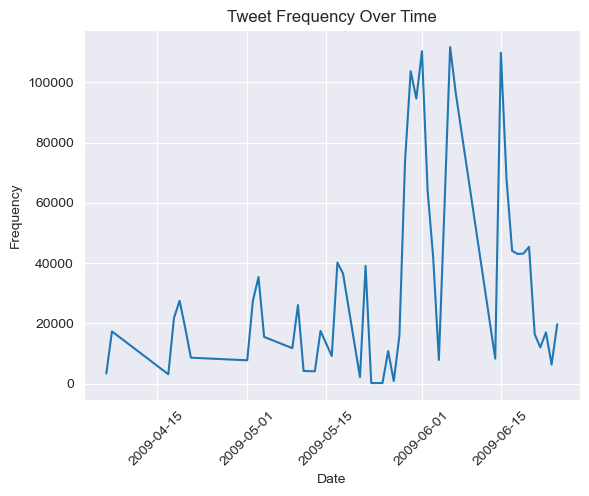

In [21]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.date.value_counts().sort_index().plot()
plt.title('Tweet Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### 4. Stemming

It is the process of reducing a word to its root word. This becomes easier for the ML model to learn as the complexity of the data is reduced.

Eg: "Changed", "Changing", "Change" can all be reduced to their root word "Chang".
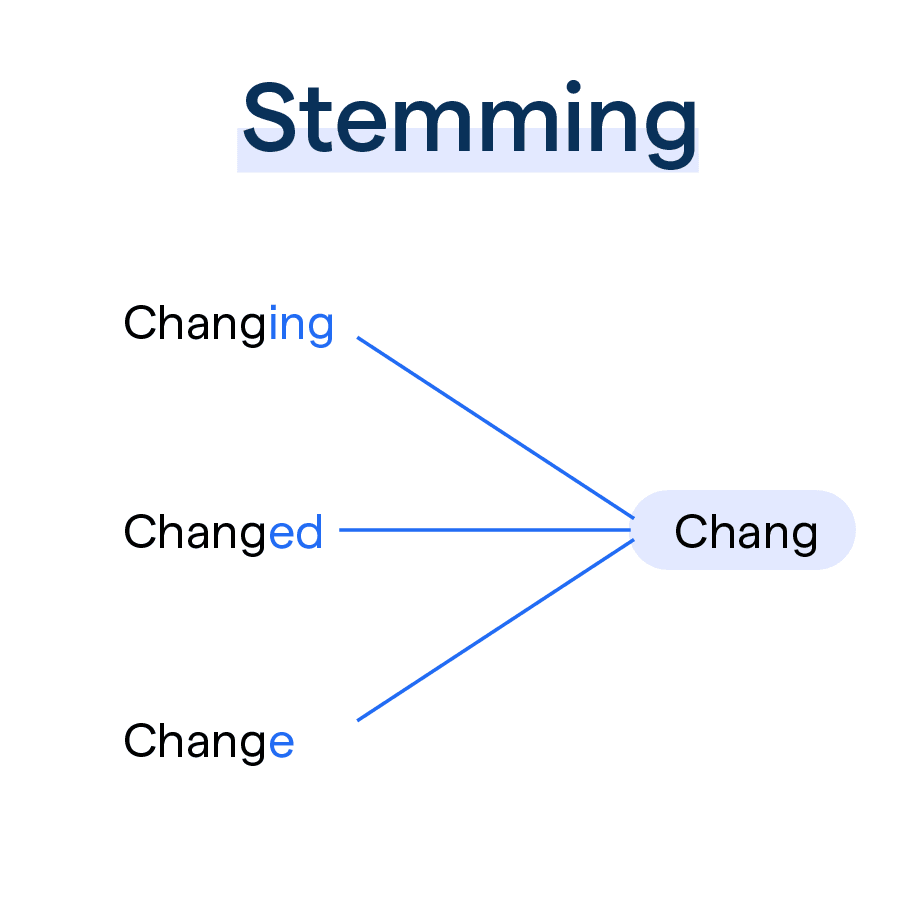

In [22]:
port_stem = PorterStemmer()

In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', " ", content)   
                                                         
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]   
                                                         
    stemmed_content = " ".join(stemmed_content)
    
    return stemmed_content

In [24]:
df["stemmed_content"] = df["text"].apply(stemming)

In [25]:
df.head(5)

,target,id,date,flag,user,text,text_length,stemmed_content
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,upset updat facebook text might cri result sch...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,kenichan dive mani time ball manag save rest g...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behav mad see


In [26]:
df.drop(['flag'], axis=1)

,target,id,date,user,text,text_length,stemmed_content
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,upset updat facebook text might cri result sch...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,kenichan dive mani time ball manag save rest g...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behav mad see
...,...,...,...,...,...,...,...
1599995,1,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,woke school best feel ever
1599996,1,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,78,thewdb com cool hear old walt interview http b...
1599997,1,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,readi mojo makeov ask detail
1599998,1,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,happi th birthday boo alll time tupac amaru sh...


In [27]:
X = df["stemmed_content"].values
y = df["target"].values

In [28]:
X

array(['switchfoot http twitpic com zl awww bummer shoulda got david carr third day',
       'upset updat facebook text might cri result school today also blah',
       'kenichan dive mani time ball manag save rest go bound', ...,
       'readi mojo makeov ask detail',
       'happi th birthday boo alll time tupac amaru shakur',
       'happi charitytuesday thenspcc sparkschar speakinguph h'],
      dtype=object)

In [29]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)                                 

In [31]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1600000,) (1280000,) (320000,)
(1600000,) (1280000,) (320000,)


In [32]:
print(X_train)

['paisleypaisley lol get idea far advanc even june yet need third knitter summer group'
 'worst headach ever'
 'ewaniesciuszko sad wont see miss alreadi yeah perfect come back th' ...
 'got home meet talk endlessli one coolest guy ever met smile'
 'bought chocol bar quot win free bar quot label win either'
 'misecia said hope dm email sunday']


In [33]:
print(X_test)

['stm denali ye black red fav color realli want color def look awesom jare'
 'qu buy open hous weekend pm best valu one bedroom lic long island citi bd http tinyurl com pt nqd'
 'ginoandfran fran greet air okay hahahaha thank' ...
 'la brat follow also hope atleast get also wish get well soon'
 'feel like decent swell sinc last fall hope wave myrtl beach week either least golf'
 'relaxin busi day']


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)


Shape of X_train_bow: (1280000, 100)
Shape of X_test_bow: (320000, 100)


In [38]:
print(X_test_bow)

[[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(X_train_bow)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [45]:
print(X_train)

  (0, 154767)	0.2697660704325824
  (0, 388138)	0.20555120011808467
  (0, 220296)	0.4301567790762487
  (0, 406297)	0.2978221095272138
  (0, 286478)	0.16123218610004275
  (0, 454381)	0.20169626473577718
  (0, 205794)	0.2414022906380175
  (0, 124524)	0.18318401951949756
  (0, 4832)	0.31707426786115905
  (0, 128605)	0.22108856600702775
  (0, 175252)	0.22407080547034602
  (0, 146067)	0.12929728405657018
  (0, 239679)	0.15130037108228483
  (0, 307108)	0.4620604881532448
  (1, 124611)	0.5113765148324884
  (1, 161801)	0.5778049407933611
  (1, 445870)	0.6361096685891185
  (2, 400192)	0.2722541116865256
  (2, 31063)	0.1936303169258752
  (2, 78861)	0.21039643874061958
  (2, 312657)	0.3154702974657607
  (2, 453420)	0.2347069337186747
  (2, 12436)	0.2529872032123258
  (2, 267649)	0.19309660201644555
  (2, 358186)	0.19837942712286838
  :	:
  (1279997, 120136)	0.5183864288132355
  (1279997, 80839)	0.4085075096529922
  (1279997, 262076)	0.3257051331036561
  (1279997, 372797)	0.3021907911926725
  (1279

In [46]:
print(X_test)

  (0, 453357)	0.1781708363247895
  (0, 435956)	0.14183025329879742
  (0, 384697)	0.3281164007446601
  (0, 335577)	0.22602158147814247
  (0, 334643)	0.14719329779308424
  (0, 240451)	0.15341308097014625
  (0, 189057)	0.31324918577405797
  (0, 129417)	0.25650960779862714
  (0, 97585)	0.4019235611854435
  (0, 96399)	0.255967788489452
  (0, 78636)	0.5158100011206617
  (0, 43712)	0.23562815302828183
  (0, 28874)	0.1778395103911245
  (1, 438137)	0.16390196841168053
  (1, 428475)	0.2850923429146983
  (1, 409742)	0.19539196331452124
  (1, 328541)	0.30370566878650734
  (1, 325414)	0.2832875855026037
  (1, 318909)	0.20246938925608493
  (1, 303003)	0.19949441578138133
  (1, 301683)	0.13212235134015302
  (1, 240223)	0.1674195650536303
  (1, 233854)	0.3852709938491561
  (1, 183279)	0.24586158827112847
  (1, 171245)	0.12468774856570086
  :	:
  (319997, 225096)	0.2933179603743362
  (319997, 169469)	0.19450444826456267
  (319997, 146067)	0.3148589224636577
  (319997, 135536)	0.2180996497753238
  (3199

## Training Model

In [40]:
modelbow = LogisticRegression(max_iter=1000)

In [41]:
modelbow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

In [42]:
X_train_prediction = modelbow.predict(X_train_bow)
training_data_accuracybow = accuracy_score(y_train, X_train_prediction)

print("Accuracy score on the Training Data: ", round(training_data_accuracybow*100, 3), "%")

Accuracy score on the Training Data:  65.683 %


In [47]:
model = LogisticRegression(max_iter=1000)

In [48]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

print("Naive Bayes Training Accuracy:", round(nb_train_accuracy*100, 3), "%")
print("Naive Bayes Testing Accuracy:", round(nb_test_accuracy*100, 3), "%")


Naive Bayes Training Accuracy: 82.031 %
Naive Bayes Testing Accuracy: 75.552 %


In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

print("Decision Tree Training Accuracy:", round(dt_train_accuracy*100, 3), "%")
print("Decision Tree Testing Accuracy:", round(dt_test_accuracy*100, 3), "%")


Decision Tree Training Accuracy: 99.589 %
Decision Tree Testing Accuracy: 71.033 %


In [104]:
filename = "sentiment_analyser_model_Naive.sav"
pickle.dump(model, open(filename, 'wb'))

In [106]:
filename = "sentiment_analyser_model_decision.sav"
pickle.dump(model, open(filename, 'wb'))

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Naive Bayes Model Evaluation Metrics
nb_train_predictions = nb_model.predict(X_train)
nb_test_predictions = nb_model.predict(X_test)

print("Naive Bayes Training Metrics:")
print(classification_report(y_train, nb_train_predictions))

print("Naive Bayes Testing Metrics:")
print(classification_report(y_test, nb_test_predictions))

# Confusion matrix for Naive Bayes
print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, nb_test_predictions))


Naive Bayes Training Metrics:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82    640000
           1       0.84      0.80      0.82    640000

    accuracy                           0.82   1280000
   macro avg       0.82      0.82      0.82   1280000
weighted avg       0.82      0.82      0.82   1280000

Naive Bayes Testing Metrics:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76    160000
           1       0.77      0.73      0.75    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Confusion Matrix for Naive Bayes:
[[125125  34875]
 [ 43360 116640]]


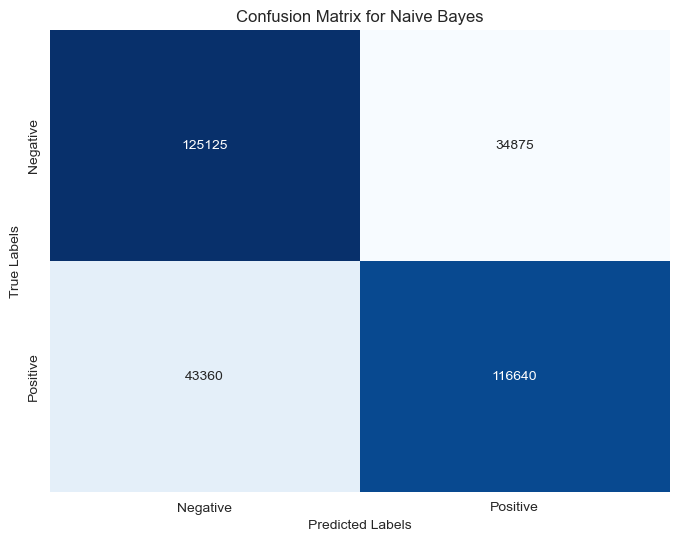

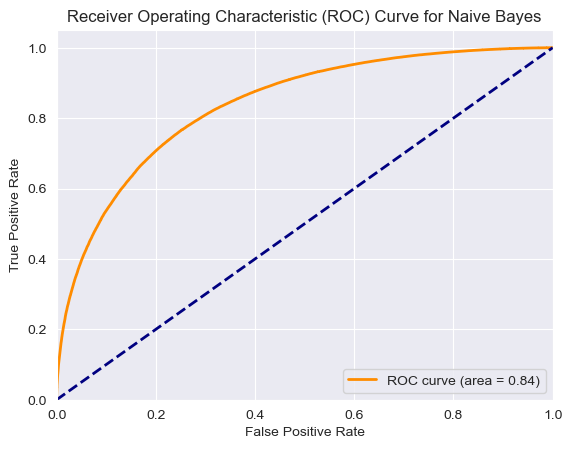

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Naive Bayes Model Evaluation Metrics
nb_train_predictions = nb_model.predict(X_train)
nb_test_predictions = nb_model.predict(X_test)

# Plot Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC Curve for Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure()
lw = 2
plt.plot(fpr_nb, tpr_nb, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()



In [52]:
# Decision Tree Model Evaluation Metrics
dt_train_predictions = dt_model.predict(X_train)
dt_test_predictions = dt_model.predict(X_test)

print("Decision Tree Training Metrics:")
print(classification_report(y_train, dt_train_predictions))

print("Decision Tree Testing Metrics:")
print(classification_report(y_test, dt_test_predictions))

# Confusion matrix for Decision Tree
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_test_predictions))


Decision Tree Training Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    640000
           1       1.00      0.99      1.00    640000

    accuracy                           1.00   1280000
   macro avg       1.00      1.00      1.00   1280000
weighted avg       1.00      1.00      1.00   1280000

Decision Tree Testing Metrics:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71    160000
           1       0.71      0.70      0.71    160000

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000

Confusion Matrix for Decision Tree:
[[114976  45024]
 [ 47670 112330]]


### 8. Model Evaluation

#### Accuracy score on the Test Data

In [93]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)

print("Accuracy score on the Testing Data: ", round(testing_data_accuracy*100, 3), "%")

Accuracy score on the Testing Data:  77.871 %


#### Accuracy score on the Training Data

In [92]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

print("Accuracy score on the Training Data: ", round(training_data_accuracy*100, 3), "%")

Accuracy score on the Training Data:  81.022 %


In [94]:
import pickle
filename_vectorizer = 'vectorizer.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb'))

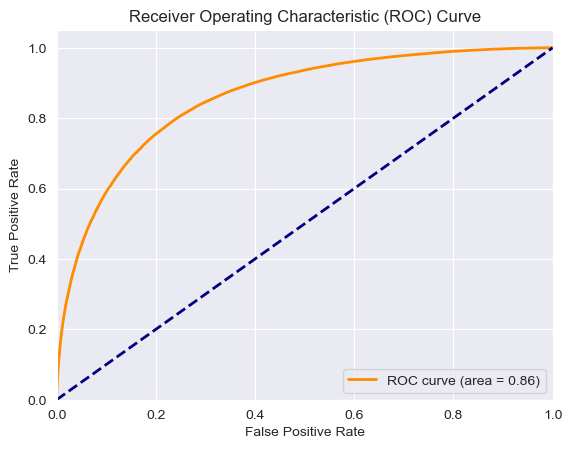

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1]) 
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

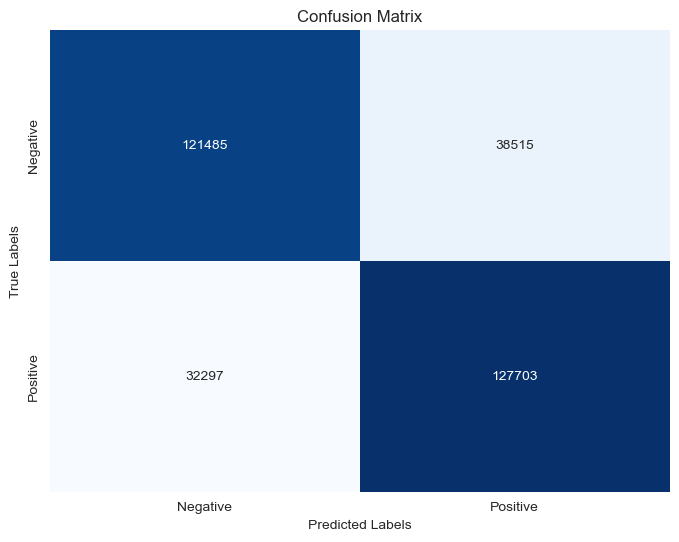

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


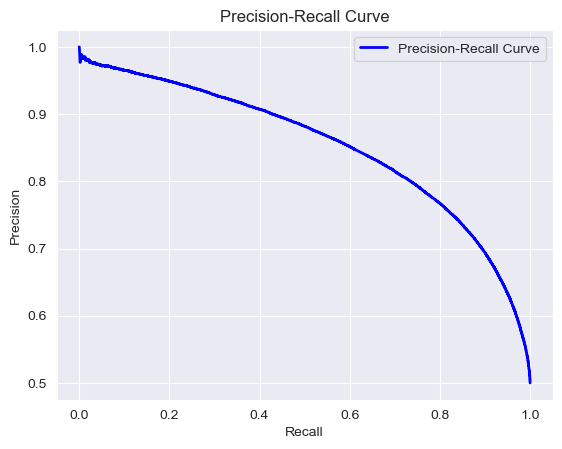

In [101]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, X_test_prediction)
print("Precision on the Testing Data: ", round(precision*100, 3), "%")

recall = recall_score(y_test, X_test_prediction)
print("Recall on the Testing Data: ", round(recall*100, 3), "%")


f1 = f1_score(y_test, X_test_prediction)
print("F1-score on the Testing Data: ", round(f1*100, 3), "%")

Precision on the Testing Data:  76.829 %
Recall on the Testing Data:  79.814 %
F1-score on the Testing Data:  78.293 %


Logistic Regression Training Metrics:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81    640000
           1       0.80      0.83      0.81    640000

    accuracy                           0.81   1280000
   macro avg       0.81      0.81      0.81   1280000
weighted avg       0.81      0.81      0.81   1280000

Logistic Regression Testing Metrics:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Confusion Matrix for Logistic Regression:
[[121485  38515]
 [ 32297 127703]]


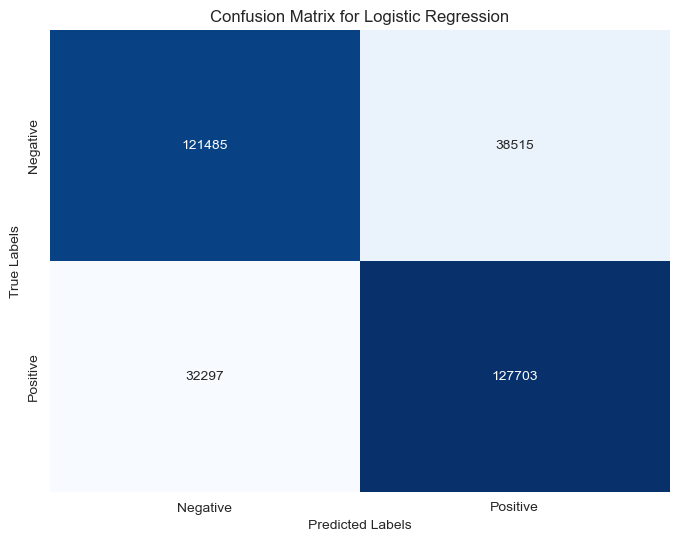

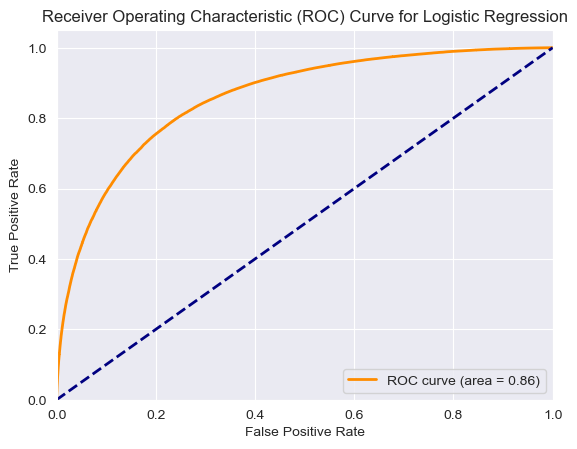

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

lr_train_predictions = model.predict(X_train)
lr_test_predictions = model.predict(X_test)

print("Logistic Regression Training Metrics:")
print(classification_report(y_train, lr_train_predictions))

print("Logistic Regression Testing Metrics:")
print(classification_report(y_test, lr_test_predictions))

print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, lr_test_predictions))

cm_lr = confusion_matrix(y_test, lr_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# ROC Curve for Logistic Regression
y_prob_lr = model.predict_proba(X_test)

# Compute ROC curve and ROC area for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression
plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


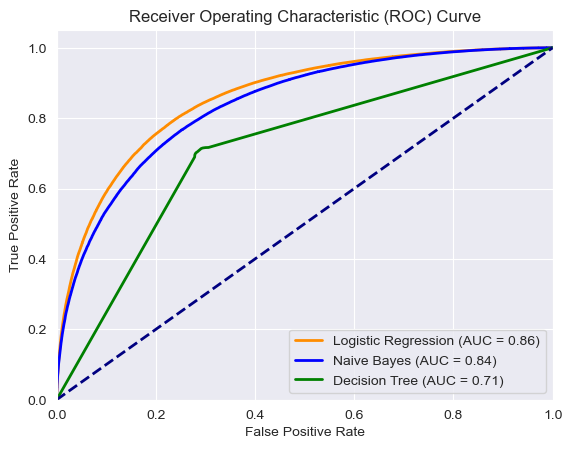

In [115]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
y_prob_lr = model.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC curve and ROC area for Decision Tree
y_prob_dt = dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for all three models
plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=lw, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_nb, tpr_nb, color='blue',
         lw=lw, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [95]:
import pickle

filename = "sentiment_analyser_model.sav"
pickle.dump(model, open(filename, 'wb'))          

### 10. Using the Saved Model for future predictions

In [4]:
loaded_model = pickle.load(open("sentiment_analyser_model.sav", 'rb'))       

In [97]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

def predict_sentiment(input_text):
    input_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([input_text])
    prediction = loaded_model.predict(input_vectorized)
    if prediction[0] == 0:
        return 'Negative Tweet'
    else:
        return 'Positive Tweet'
vectorizer = pickle.load(open('vectorizer.sav', 'rb'))
user_input = input("Enter a tweet: ")
result = predict_sentiment(user_input)
print("Prediction:", result)

Enter a tweet: HIEE
Prediction: Positive Tweet


# For GUI

In [6]:
import tkinter as tk
from tkinter import filedialog as fd
from PIL import ImageTk, Image
import pickle
import re
from nltk.corpus import stopwords

vectorizer = pickle.load(open('vectorizer.sav', 'rb'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

def predict_sentiment(input_text):
    input_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([input_text])
    prediction = loaded_model.predict(input_vectorized)
    if prediction[0] == 0:
        return 'Negative Tweet'
    else:
        return 'Positive Tweet'

def plot_sentiment_distribution():
    sentiment_window = tk.Toplevel(master)
    sentiment_window.title("Sentiment Distribution")
    img = Image.open('sentiment.jpg')
    resized_img = img.resize((int(master.winfo_width() * 0.8), int(master.winfo_height() * 0.8)))
    img = ImageTk.PhotoImage(resized_img)
    panel = tk.Label(sentiment_window, image=img)
    panel.image = img
    panel.pack()

def Top_20_Users_by_Tweet_Count():
    users_window = tk.Toplevel(master)
    users_window.title("Top 20 Users by Tweet Count")
    img = Image.open('Tweetcount.png')
    resized_img = img.resize((int(master.winfo_width() * 0.8), int(master.winfo_height() * 0.8)))
    img = ImageTk.PhotoImage(resized_img)
    panel = tk.Label(users_window, image=img)
    panel.image = img
    panel.pack()

def confusion():
    confusion_window = tk.Toplevel(master)
    confusion_window.title("Confusion Matrix")
    img = Image.open('confusion1.png')
    resized_img = img.resize((int(master.winfo_width() * 0.8), int(master.winfo_height() * 0.8)))
    img = ImageTk.PhotoImage(resized_img)
    panel = tk.Label(confusion_window, image=img)
    panel.image = img
    panel.pack()

def Temporal():
    temporal_window = tk.Toplevel(master)
    temporal_window.title("Temporal Analysis")
    img = Image.open('temporal.jpg')
    resized_img = img.resize((int(master.winfo_width() * 0.8), int(master.winfo_height() * 0.8)))
    img = ImageTk.PhotoImage(resized_img)
    panel = tk.Label(temporal_window, image=img)
    panel.image = img
    panel.pack()

def roc():
    roc_window = tk.Toplevel(master)
    roc_window.title("ROC Curve")
    img = Image.open('roc.png')
    resized_img = img.resize((int(master.winfo_width() * 0.8), int(master.winfo_height() * 0.8)))
    img = ImageTk.PhotoImage(resized_img)
    panel = tk.Label(roc_window, image=img)
    panel.image = img
    panel.pack()

def textlength():
    textlength_window = tk.Toplevel(master)
    textlength_window.title("Text Length Analysis")
    img = Image.open('textlength.png')
    resized_img = img.resize((int(master.winfo_width() * 0.8), int(master.winfo_height() * 0.8)))
    img = ImageTk.PhotoImage(resized_img)
    panel = tk.Label(textlength_window, image=img)
    panel.image = img
    panel.pack()

def analyze_sentiment(tweet):
    result = predict_sentiment(tweet)
    output_var.set(f"Sentiment: {result}")

master = tk.Tk()
master.configure(bg='#347286')
master.title("Twitter Sentiment Analysis")

title_label = tk.Label(master, text="Twitter Sentiment Analysis", fg="Darkblue", bg="LightGreen", font="Verdana 15 bold")
title_label.pack(pady=10)


tweet_input_label = tk.Label(master, text="Enter Tweet:", fg="black", font="Verdana 10 bold")
tweet_input_label.pack(pady=5)

tweet_input_var = tk.StringVar()
tweet_input_entry = tk.Entry(master, textvariable=tweet_input_var, font="Verdana 10")
tweet_input_entry.pack(pady=5)


output_var = tk.StringVar()
output_label = tk.Label(master, textvariable=output_var, fg="black", bg="white", font="Verdana 12 bold", wraplength=300)
output_label.pack(pady=5)


sentiment_button = tk.Button(master, text="Analyze Sentiment", command=lambda: analyze_sentiment(tweet_input_var.get()), bg='#505057', fg='white', font="Verdana 10 bold")
sentiment_button.pack(pady=5)

analysis_buttons = [
    ("Sentiment Distribution", plot_sentiment_distribution),
    ("Top 20 Users", Top_20_Users_by_Tweet_Count),
    ("Temporal Analysis", Temporal),
    ("Roc Curve", roc),
    ("Confusion Matrix", confusion),
    ("Text Length Analysis", textlength)
]

for text, command in analysis_buttons:
    button = tk.Button(master, text=text, command=command, bg='#505057', fg='white', font="Verdana 10 bold")
    button.pack(pady=5)

master.geometry("500x600")
master.mainloop()
